# EDA (Exploratory data analysis)
## For "Fake News" dataset
### Developed by: Sebastián Marroquín

***

### 1. Import libraries

In [1]:
# Import the libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
sns.set(style="darkgrid")

[nltk_data] Downloading package punkt to /home/smm96/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/smm96/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 2. Load the dataset's

In [2]:
realDf = pd.read_csv('True.csv')
fakeDf = pd.read_csv('Fake.csv')

#### Head of Real & Fake New's

In [3]:
realDf.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fakeDf.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


#### Info about the dataframe's

In [5]:
realDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
fakeDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


#### We will add the target value that each data set represents.

In [7]:
realDf['target'] = 1
fakeDf['target'] = 0

#### Show the dataset's tail

In [8]:
realDf.tail()

,title,text,subject,date,target
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [9]:
fakeDf.tail()

,title,text,subject,date,target
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


#### 2.1 Data report

In [34]:
import sweetviz as sv

In [35]:
compareReport = sv.compare([realDf, 'Real News'], [fakeDf, 'Fake News'])

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)



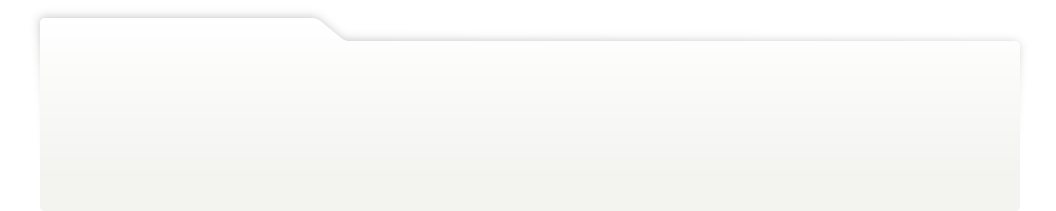
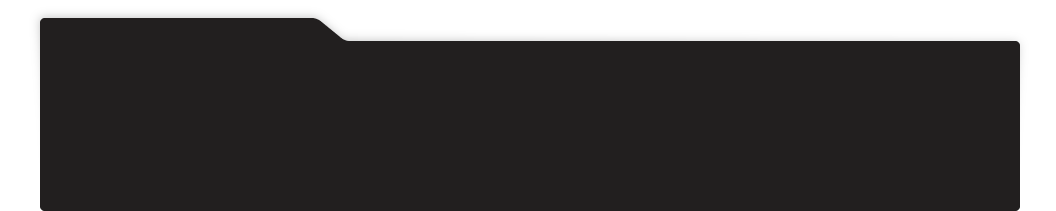
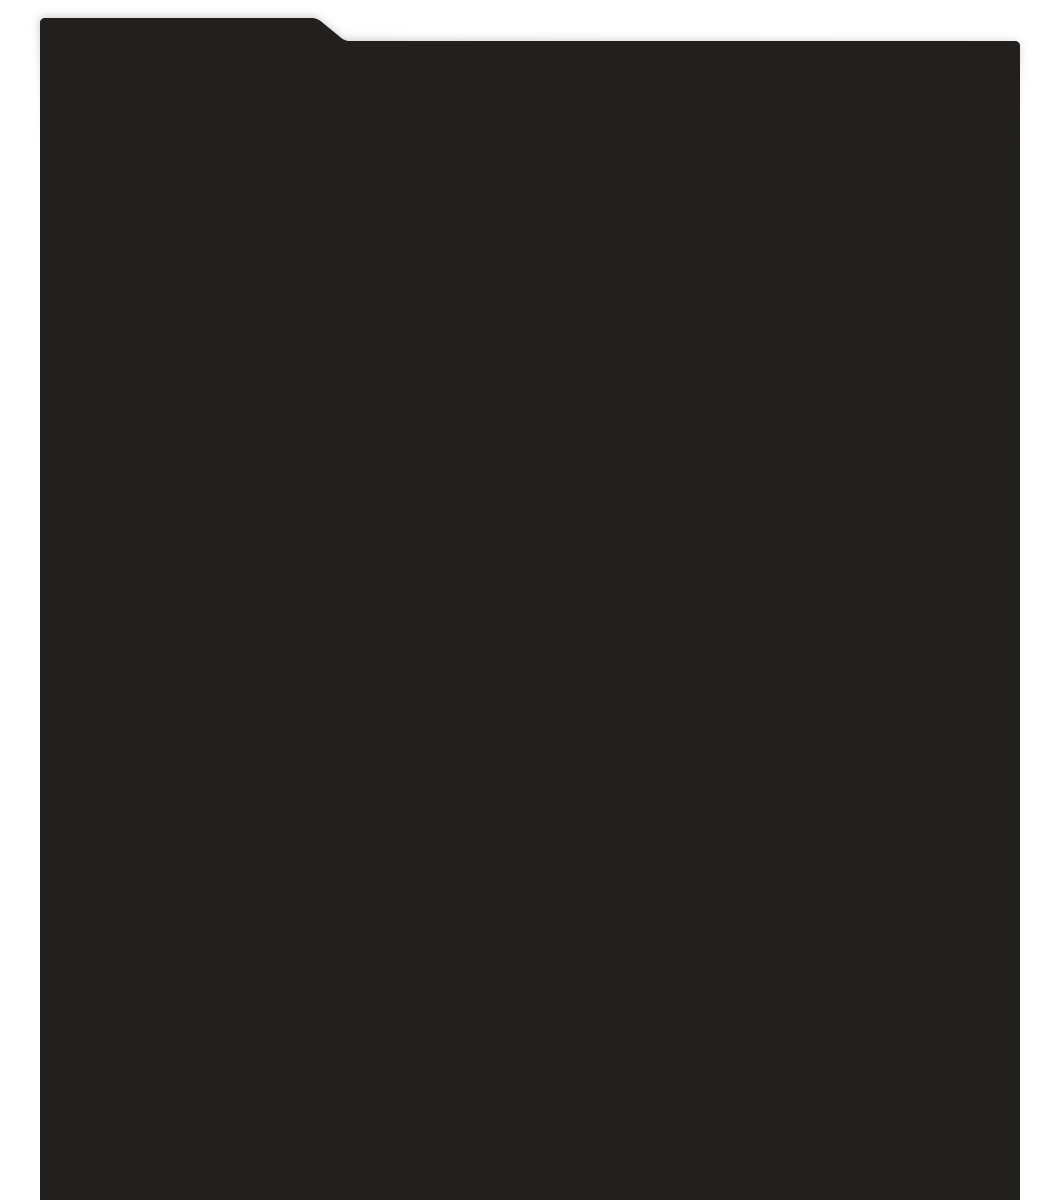
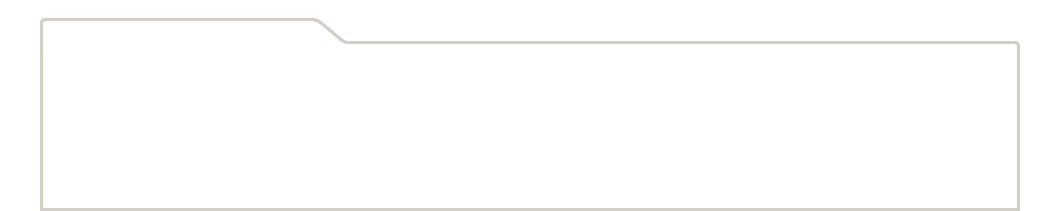
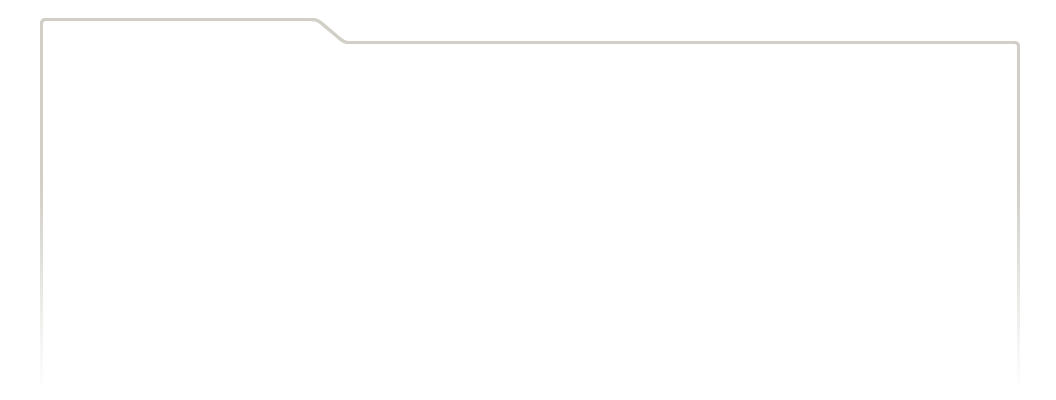
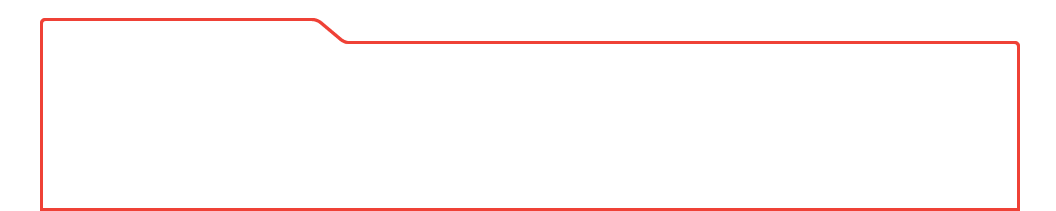
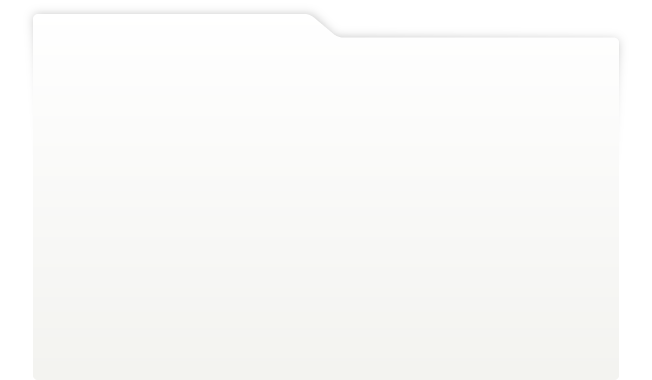
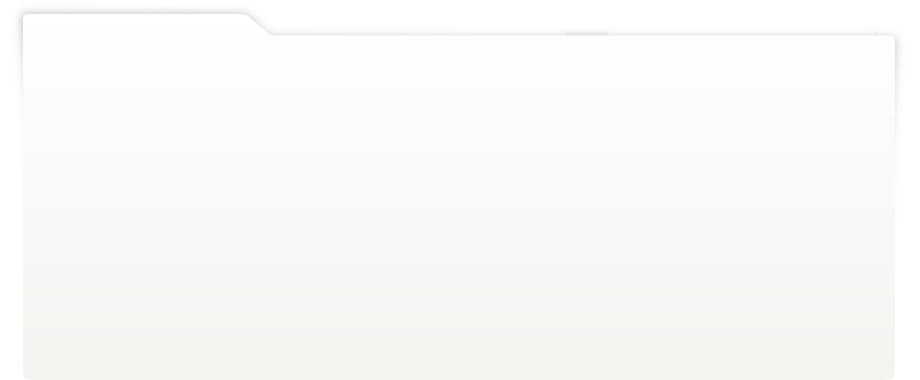
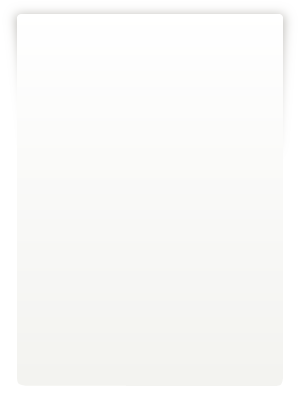
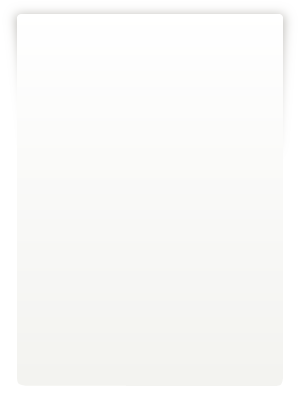
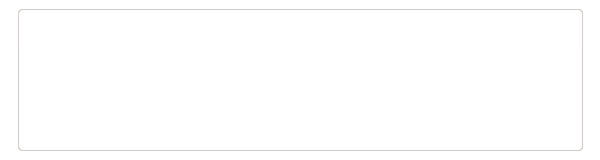
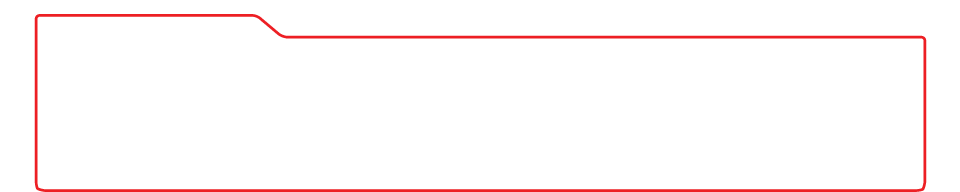
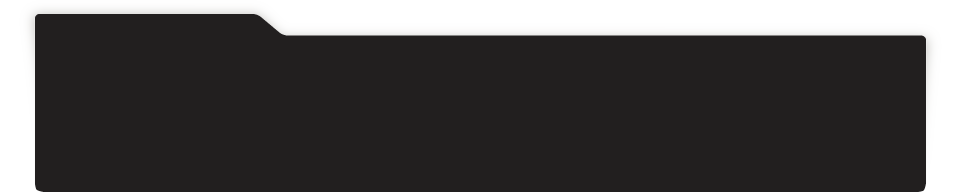
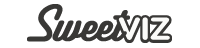
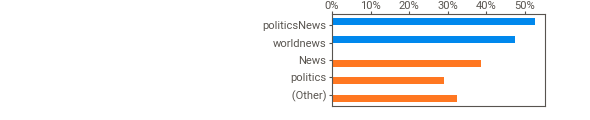
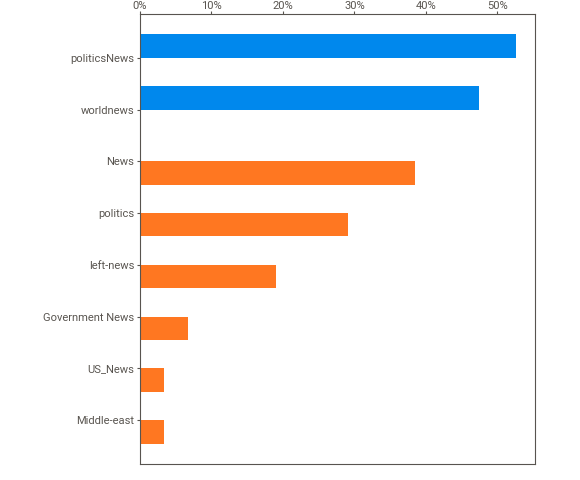
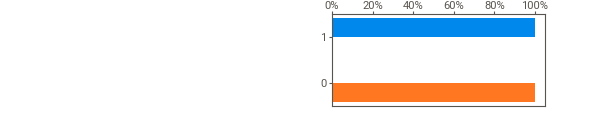
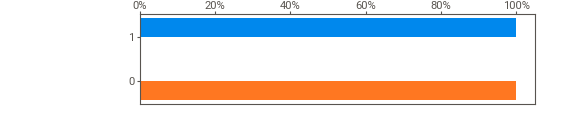
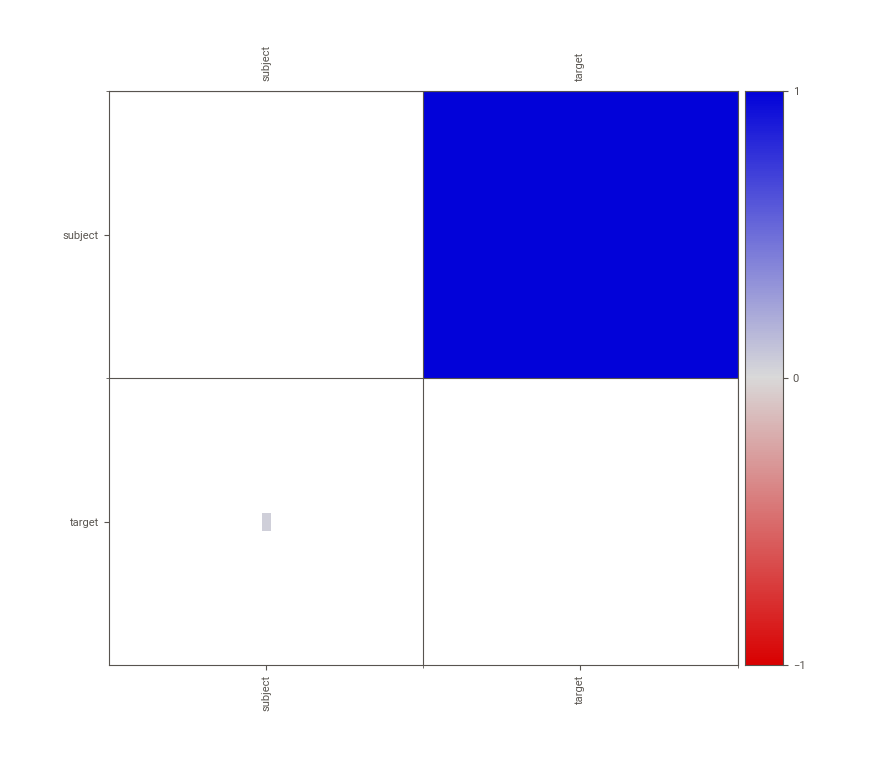
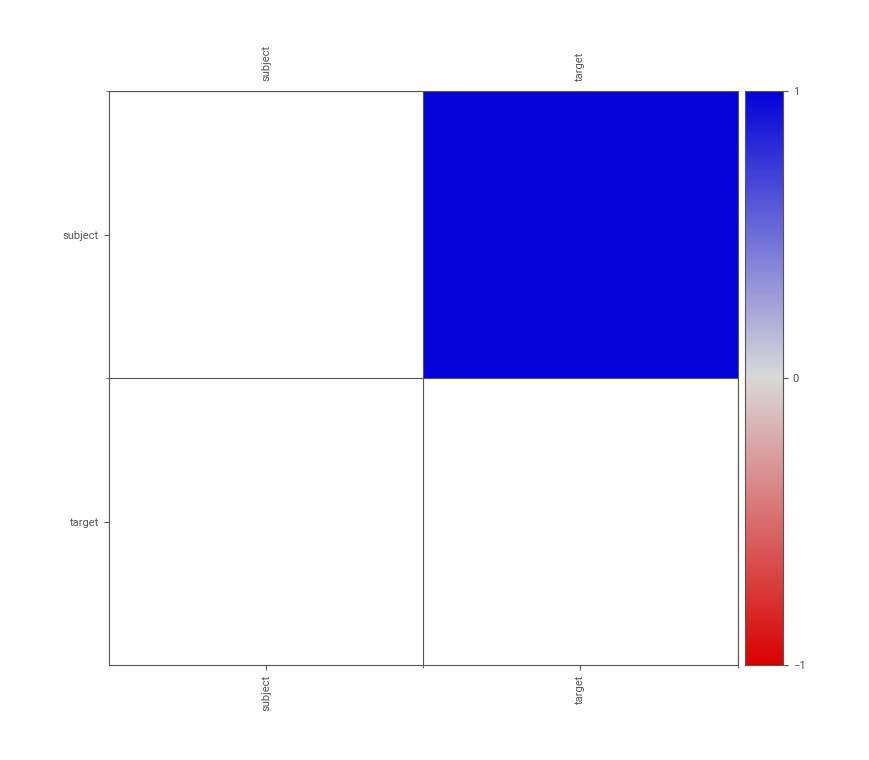

In [36]:
compareReport.show_notebook()

### 3. WordCloud

#### Fake news titles in WordCloud

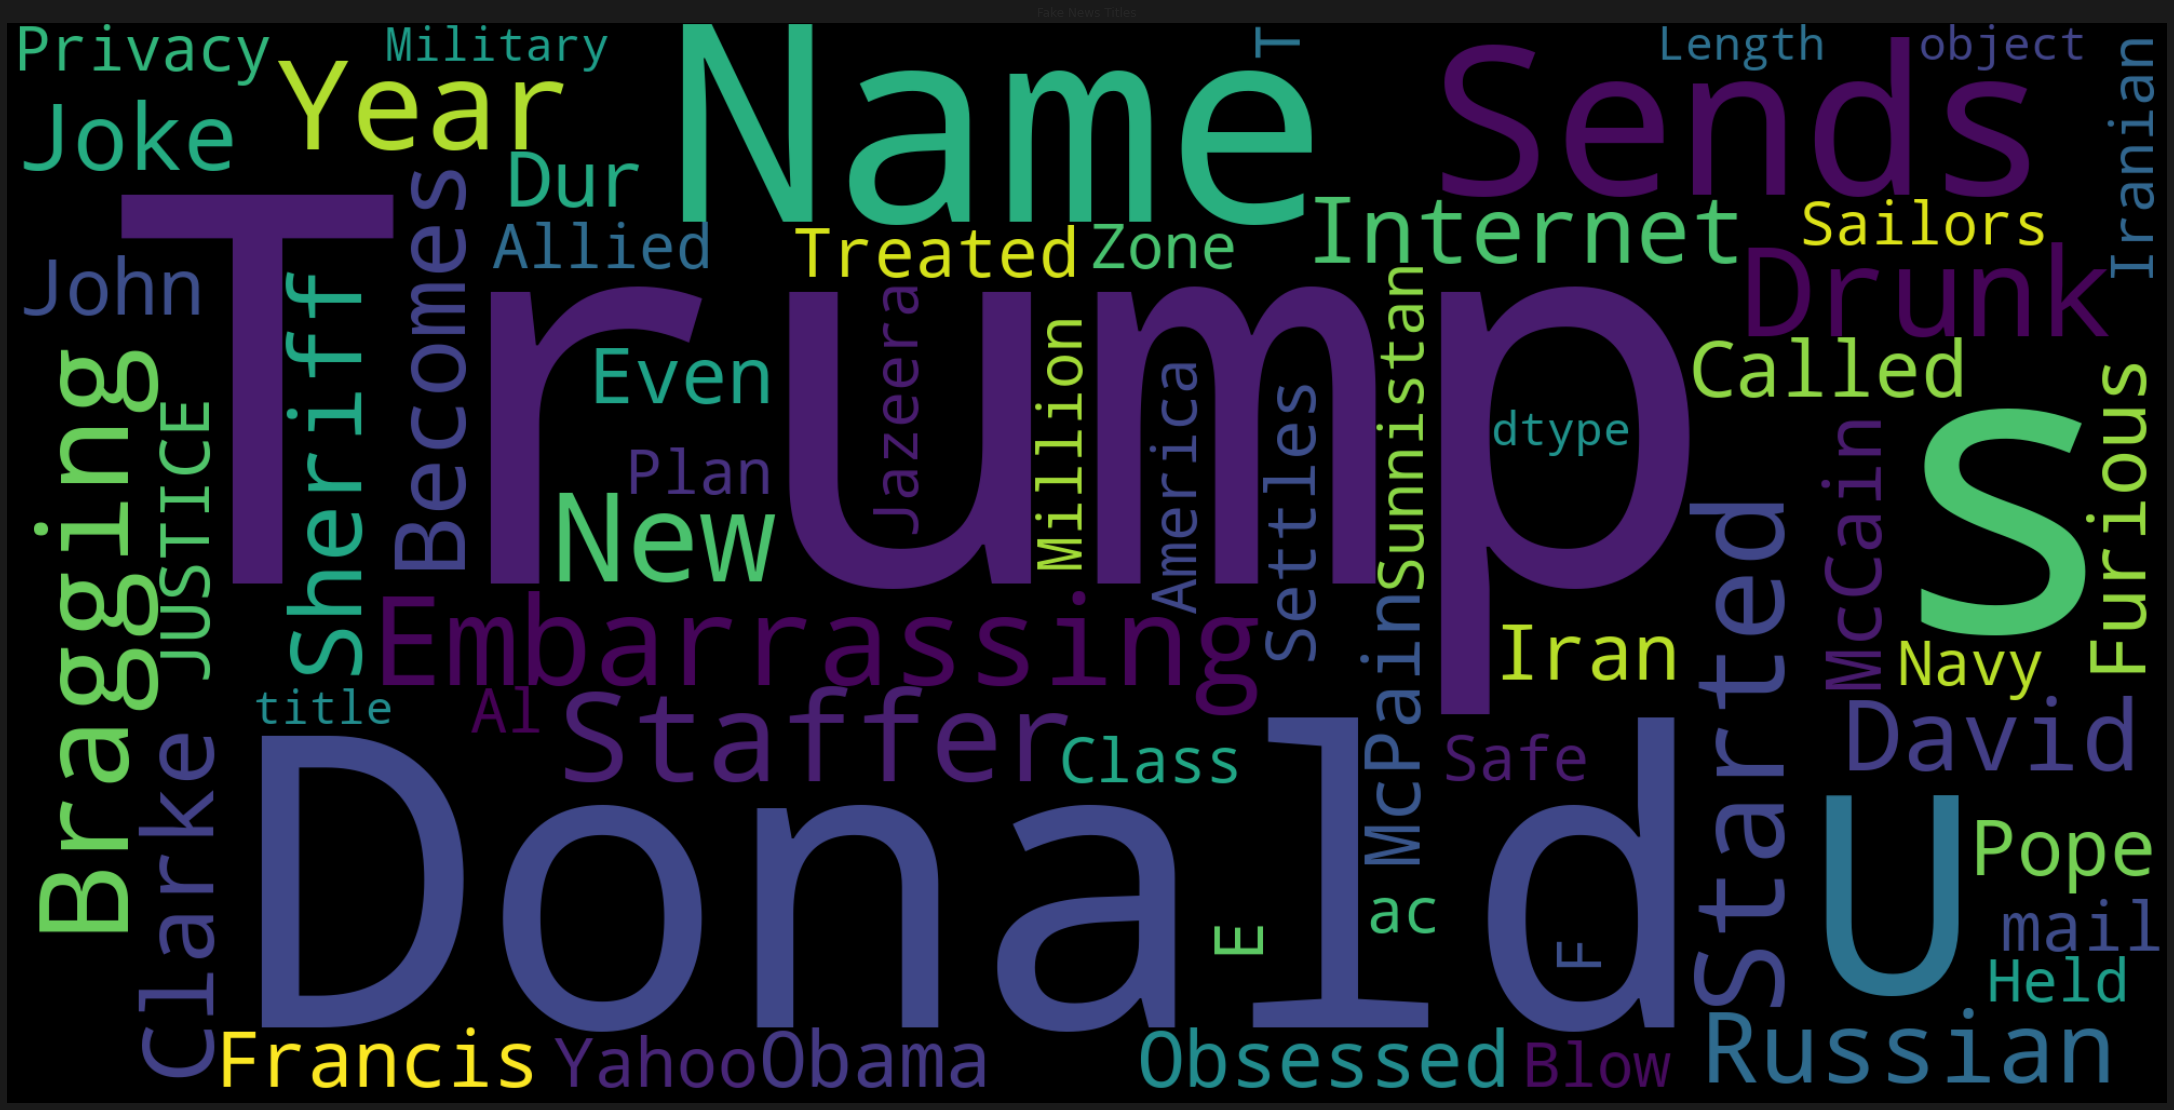

In [10]:
text = fakeDf.title
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Fake News Titles')
plt.tight_layout(pad=0)
plt.show()

#### Real news in WordCloud

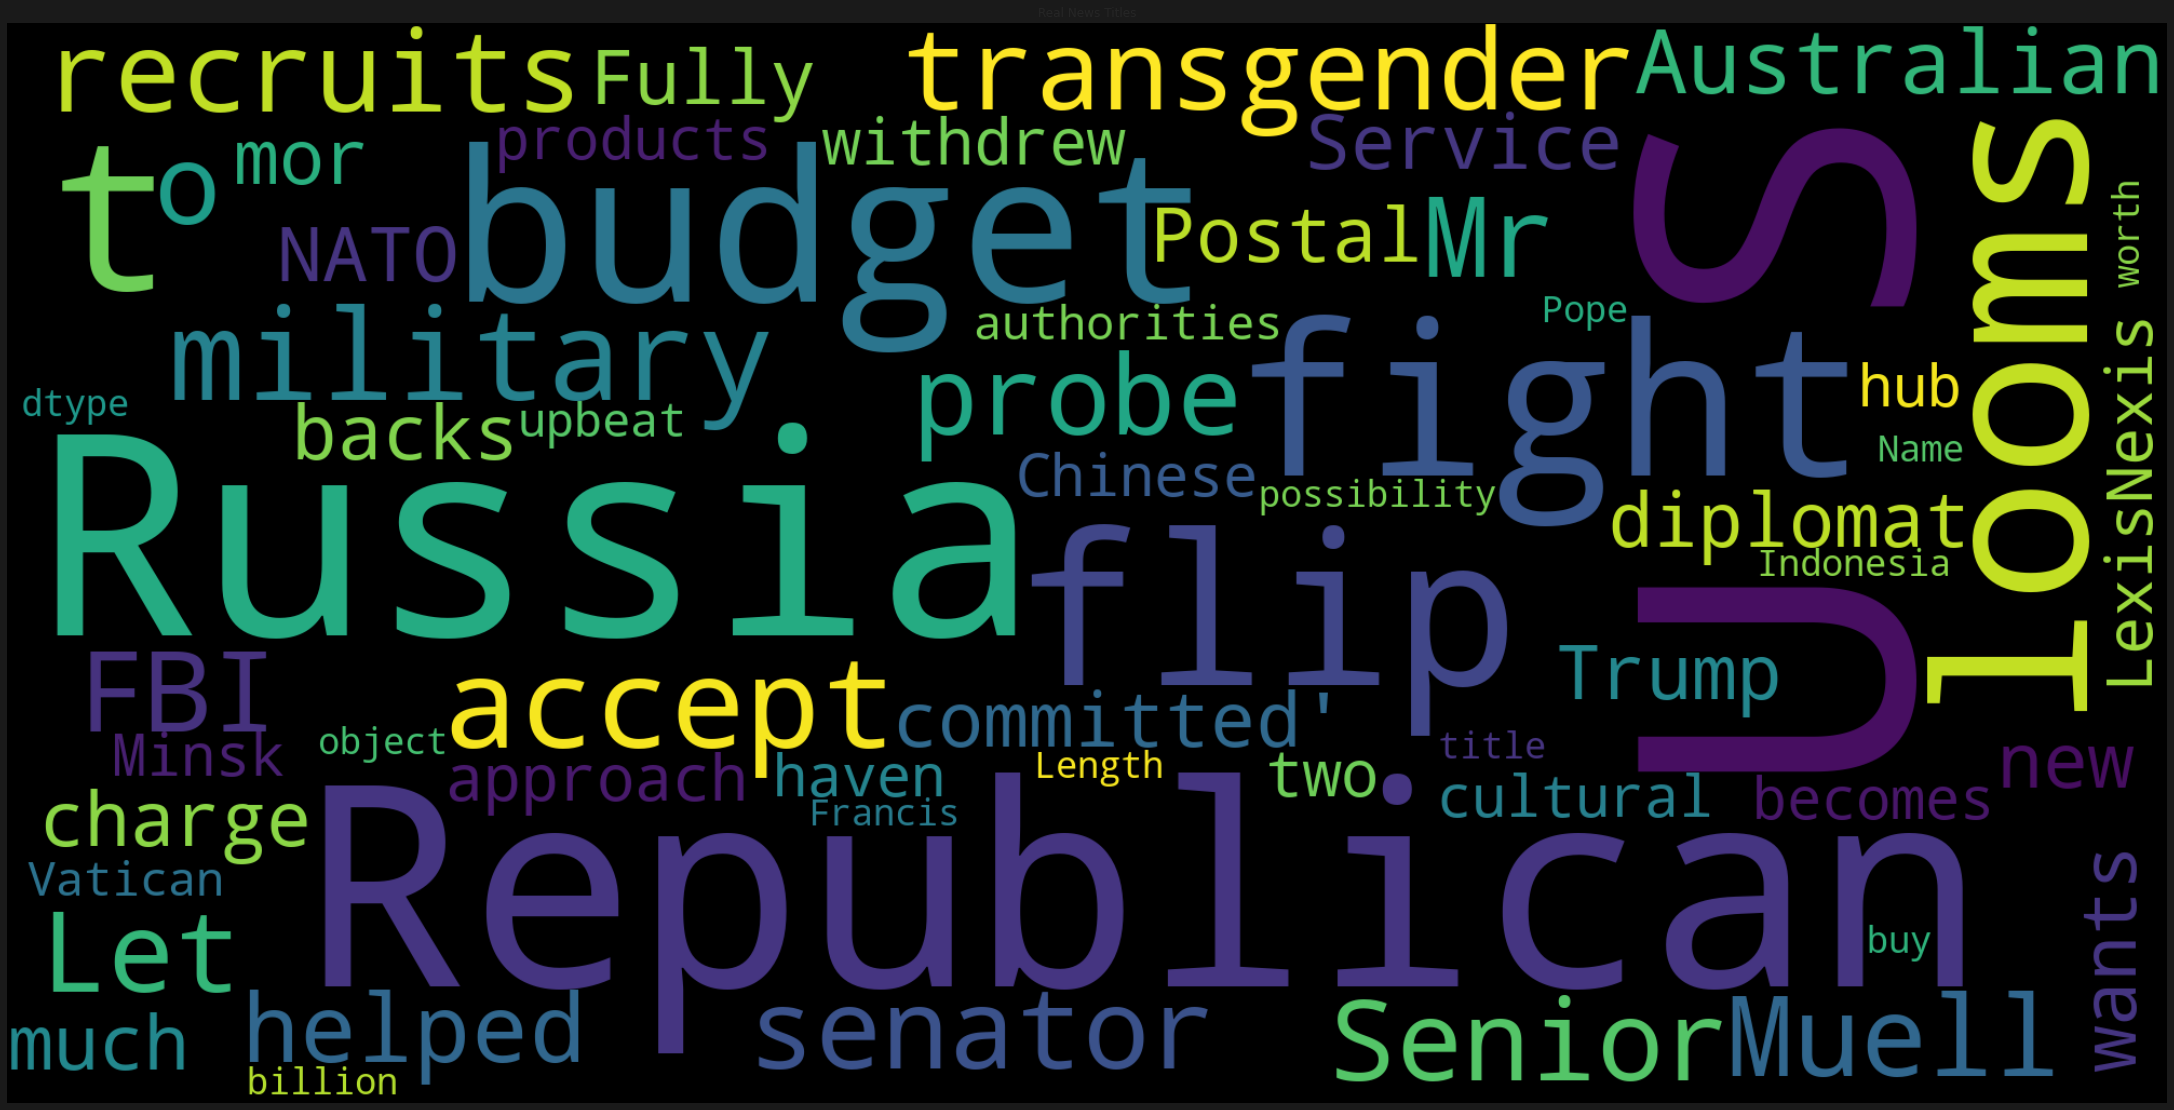

In [11]:
text = realDf.title
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Real News Titles')
plt.tight_layout(pad=0)
plt.show()

We will combine the data sets in a single variable, this in order to have the target variables of each of the news within the data sets.

In [12]:
mergeData = pd.concat([realDf, fakeDf], ignore_index=True, sort=False)

In [13]:
# Show the tail of the merged data
mergeData.tail()

,title,text,subject,date,target
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


### 4. Data visualization

#### News distribution by objective variables of false or real

Text(0.5, 1.0, "Data distribution of Fake & Real New's")

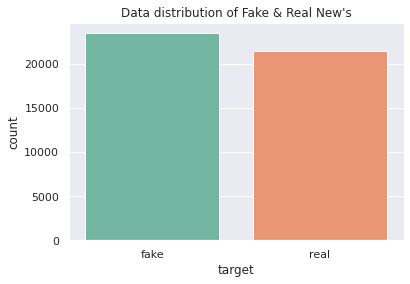

In [14]:
axis = sns.countplot(x='target', data=mergeData, palette='Set2')
axis.set(xticklabels = ['fake', 'real'])
plt.title("Data distribution of Fake & Real New's")

#### News distribution by type of news

Text(0.5, 1.0, "Data distribution of Fake & Real New's by Subject")

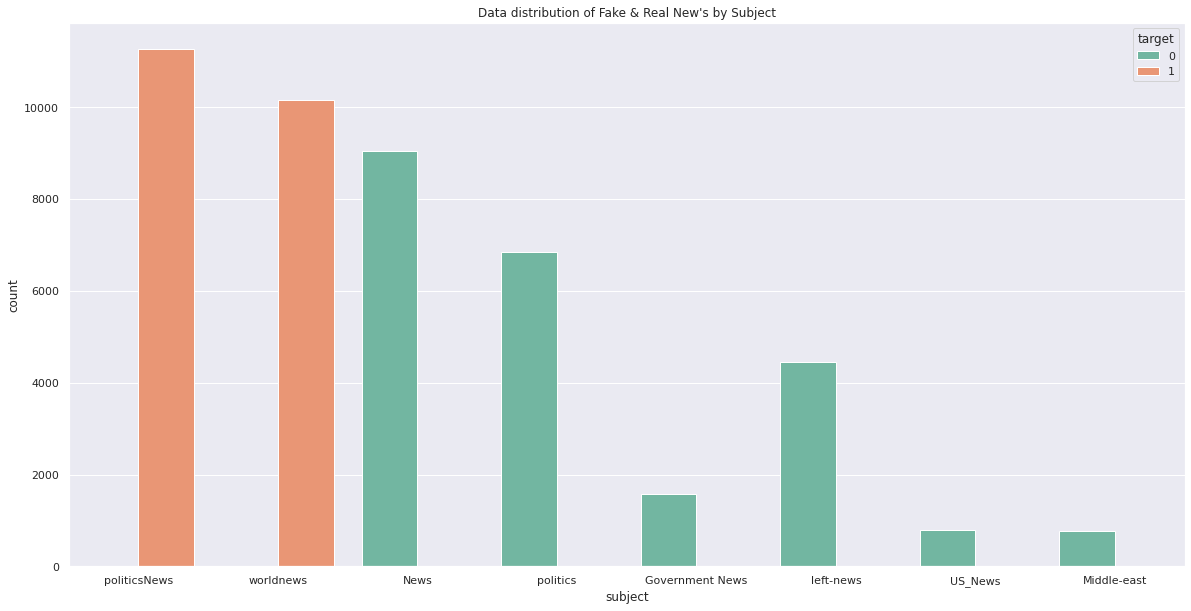

In [15]:
plt.figure(figsize=(20,10))
axis = sns.countplot(x='subject', hue='target' ,data=mergeData, palette='Set2')
plt.title("Data distribution of Fake & Real New's by Subject")

#### Count for subject

In [16]:
mergeData.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

### 5. Data cleaning

In [17]:
def clean_train_data(x):
    text = x
    text = text.lower()
    # remove square brackets
    text = re.sub('\[.*?\]', '', text)
    # remove punctuation
    text = re.sub(r'[^\w\s]','',text) 
    # remove word's containing numbers
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub('\n', '', text)
    return text

In [18]:
cleanMergeData = mergeData.copy()
cleanMergeData['text'] = mergeData.text.apply(lambda x : clean_train_data(x))

In [19]:
cleanMergeData.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters the head of a conservative...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington reuters transgender people will be...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters the special counsel invest...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geo...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tr...,politicsNews,"December 29, 2017",1


In [20]:
cleanMergeData.tail()

,title,text,subject,date,target
44893,McPain: John McCain Furious That Iran Treated ...,century wire says as reported earlier this w...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,century wire says it s a familiar theme whene...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,patrick henningsen century wireremember when...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,century wire says al jazeera america will go ...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,century wire says as predicted in its new ye...,Middle-east,"January 12, 2016",0


### 6. Remove the stopwords

In [21]:
enStopWords = nltk.corpus.stopwords.words('english')

In [22]:
def remove_eng_stopwords(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [word for word in token_text if word not in enStopWords]
    join_text = ' '.join(remove_stop)
    return join_text

In [23]:
stopWordMergeData = cleanMergeData.copy()
stopWordMergeData['text'] = cleanMergeData.text.apply(lambda x : remove_eng_stopwords(x))

In [28]:
stopWordMergeData.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters head conservative republica...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,washington reuters transgender people allowed ...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters special counsel investigati...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,seattlewashington reuters president donald tru...,politicsNews,"December 29, 2017",1


### 7. Most common words

In [29]:
from itertools import chain
from collections import Counter

In [31]:
listWords = stopWordMergeData['text'].str.split()
listWordsMerged = list(chain(*listWords))

aux = Counter(listWordsMerged)
df = pd.DataFrame(data=aux, index=['count'])
mostCommon = df.T.sort_values(by=['count'], ascending=False).reset_index().head(50)
mostCommon.head()

,index,count
0,said,130051
1,trump,115869
2,us,63100
3,would,54929
4,president,51005


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'said'),
  Text(1, 0, 'trump'),
  Text(2, 0, 'us'),
  Text(3, 0, 'would'),
  Text(4, 0, 'president'),
  Text(5, 0, 'people'),
  Text(6, 0, 'one'),
  Text(7, 0, 'state'),
  Text(8, 0, 'also'),
  Text(9, 0, 'new'),
  Text(10, 0, 'reuters'),
  Text(11, 0, 'donald'),
  Text(12, 0, 'states'),
  Text(13, 0, 'house'),
  Text(14, 0, 'government'),
  Text(15, 0, 'clinton'),
  Text(16, 0, 'obama'),
  Text(17, 0, 'republican'),
  Text(18, 0, 'could'),
  Text(19, 0, 'united'),
  Text(20, 0, 'told'),
  Text(21, 0, 'white'),
  Text(22, 0, 'like'),
  Text(23, 0, 'campaign'),
  Text(24, 0, 'last'),
  Text(25, 0, 'news'),
  Text(26, 0, 'two'),
  Text(27, 0, 'time'),
  Text(28, 0, 'election'),
  Text(29, 0, 'party'),
  Text(30, 0, 'first'),
  Text(31, 0, 'former'),
  T

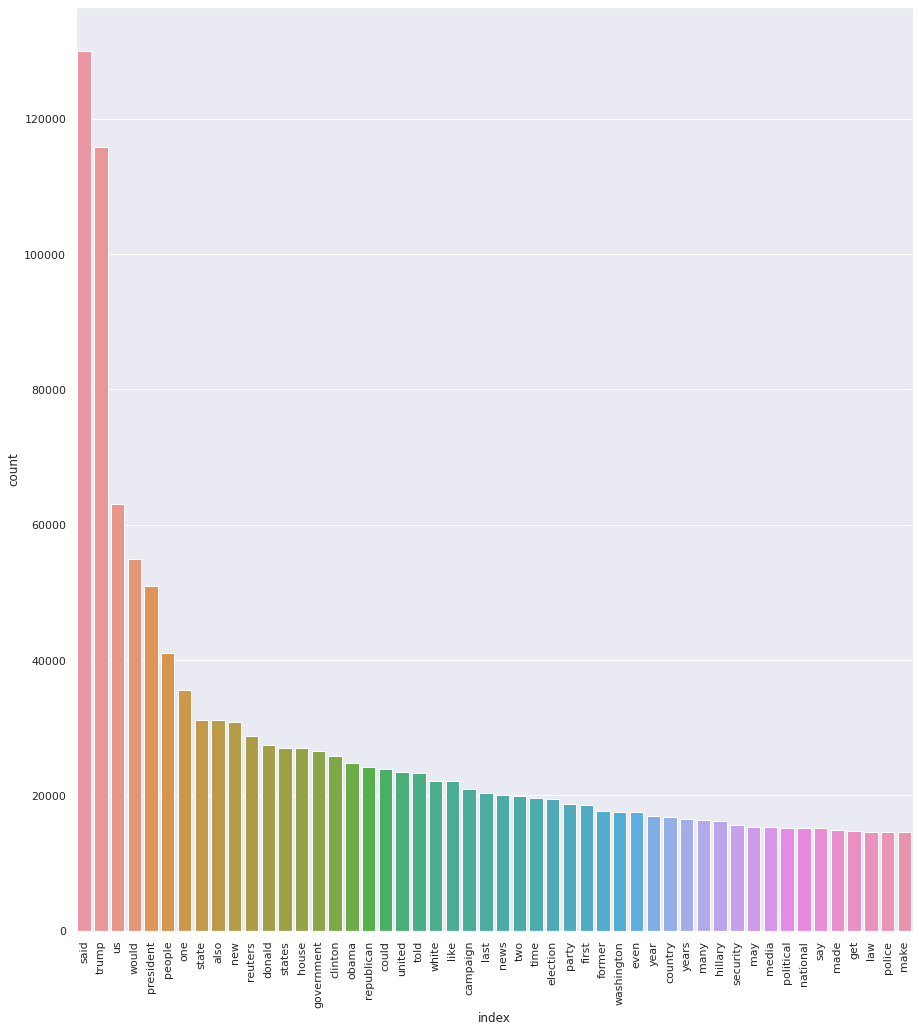

In [33]:
plt.figure(figsize=(15,17))
sns.barplot(x='index', y='count', data=mostCommon)
plt.xticks(rotation=90)